In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### The purpose of this script is to keep only the columns that will be useful in the future and make new csv's

In [8]:
cheqdet = pd.read_csv('../r42_db/cheqdet.csv')
cheques = pd.read_csv('../r42_db/cheques.csv')

C:\Users\sebas\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7,26,29,43,47,65,66,92,99,115,116) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [26]:
def drop_nans_1(df):
        to_drop = df.columns[df.isna().sum()/df.shape[0]==1]
        df = df.drop(to_drop, axis=1)
        return df

In [27]:
drop_nans_1(cheques)

,folio,numcheque,fecha,salidarepartidor,arriborepartidor,cierre,mesa,nopersonas,idmesero,pagado,...,totalconpropinacargodonativo,ChangeStatusSRX,comandaimpresacancelada,status_domicilio,enviopagado,sl_importe_descuento,TUKI_AccumulatedPoints,TUKI_CurrentPoints,sl_num_cupones,SentSync
0,1,1,2018-02-01 16:13:38.000,NaN,NaN,2018-02-01 19:47:17.000,11,8,3.0,1,...,0.0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0
1,2,2,2018-02-01 19:56:38.000,NaN,NaN,2018-02-01 20:25:08.000,10,1,3.0,1,...,0.0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0
2,3,3,2018-02-01 20:28:14.000,NaN,NaN,2018-02-01 20:29:02.000,1,1,3.0,1,...,0.0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0
3,4,4,2018-02-01 20:33:06.000,NaN,NaN,2018-02-01 21:14:25.000,1,1,4.0,1,...,0.0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0
4,5,5,2018-02-01 20:59:32.000,NaN,NaN,2018-02-01 21:16:29.000,5,1,4.0,1,...,0.0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49733,51218,49743,2022-03-12 20:42:15.000,2022-03-12 21:26:59.000,2022-03-12 21:27:05.000,2022-03-12 20:42:39.000,NaN,1,12.0,1,...,0.0,1.0,0.0,0,0,0.0,0.0,0.0,0.0,0
49734,51219,49744,2022-03-12 20:46:26.000,2022-03-12 21:27:11.000,2022-03-12 21:50:18.000,2022-03-12 20:46:44.000,NaN,1,16.0,1,...,0.0,1.0,0.0,0,0,0.0,0.0,0.0,0.0,0
49735,51220,49745,2022-03-12 20:48:10.000,2022-03-12 21:27:15.000,2022-03-12 21:50:26.000,2022-03-12 20:48:25.000,NaN,1,15.0,1,...,0.0,1.0,0.0,0,0,0.0,0.0,0.0,0.0,0
49736,51221,49746,2022-03-12 21:00:15.000,NaN,NaN,2022-03-12 21:13:02.000,6.0,8,4.0,1,...,0.0,1.0,0.0,0,0,0.0,0.0,0.0,0.0,0


In [88]:
cheques_keep = ['folio','fecha', 'cambio','descuento', 'idcliente','tipodeservicio','total','efectivo','tarjeta', 'totalalimentos','totalbebidas']

In [89]:
cheques_u = cheques[cheques_keep]

In [90]:
cheques_u

,folio,fecha,cambio,descuento,idcliente,tipodeservicio,total,efectivo,tarjeta,totalalimentos,totalbebidas
0,1,2018-02-01 16:13:38.000,0.0,0.0,NaN,1,825.0,825.0,0.0,551.7241,159.4828
1,2,2018-02-01 19:56:38.000,0.0,0.0,NaN,1,85.0,85.0,0.0,51.7241,21.5517
2,3,2018-02-01 20:28:14.000,0.0,0.0,NaN,1,120.0,120.0,0.0,81.8966,21.5517
3,4,2018-02-01 20:33:06.000,0.0,0.0,NaN,1,490.0,0.0,539.0,336.2069,86.2069
4,5,2018-02-01 20:59:32.000,0.0,0.0,NaN,1,600.0,0.0,600.0,344.8276,172.4138
...,...,...,...,...,...,...,...,...,...,...,...
49733,51218,2022-03-12 20:42:15.000,0.0,0.0,006446,2,220.0,220.0,0.0,189.6552,0.0000
49734,51219,2022-03-12 20:46:26.000,0.0,0.0,001082,2,280.0,280.0,0.0,241.3793,0.0000
49735,51220,2022-03-12 20:48:10.000,0.0,0.0,002714,2,280.0,280.0,0.0,241.3793,0.0000
49736,51221,2022-03-12 21:00:15.000,0.0,0.0,NaN,1,940.0,0.0,1034.0,491.3793,318.9655


In [52]:
ef_y_t = [cheques_u.efectivo.sum()/cheques_u.total.sum(),cheques_u.tarjeta.sum()/cheques_u.total.sum()] 

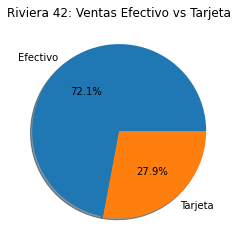

In [62]:
plt.pie(ef_y_t, shadow=True, labels =['Efectivo','Tarjeta'],autopct= lambda pct: f'{pct:.1f}%')
plt.title('Riviera 42: Ventas Efectivo vs Tarjeta')
plt.show()

In [64]:
cheques_u.to_csv('../r42_analysis/cheques_u.csv')

In [65]:
cheqdet

,foliodet,movimiento,comanda,cantidad,idproducto,descuento,precio,impuesto1,impuesto2,impuesto3,...,subtotalsrx,totalsrx,idlistaprecio,tipocambio,idmovtobillar,impuestoimporte3,estrateca_DiscountCode,estrateca_DiscountID,estrateca_DiscountAmount,saledetailid
0,2,1,NaN,1.0,11002,0.0,60.0,16.0,0.0,0.0,...,-1.0,-1.0,NaN,NaN,0,0.0,NaN,NaN,0.0,NaN
1,2,2,NaN,1.0,1005,0.0,25.0,16.0,0.0,0.0,...,-1.0,-1.0,NaN,NaN,0,0.0,NaN,NaN,0.0,NaN
2,3,1,NaN,1.0,5003,0.0,0.0,16.0,0.0,0.0,...,-1.0,-1.0,NaN,NaN,0,0.0,NaN,NaN,0.0,NaN
3,3,2,NaN,1.0,8003,0.0,95.0,16.0,0.0,0.0,...,-1.0,-1.0,NaN,NaN,0,0.0,NaN,NaN,0.0,NaN
4,3,3,NaN,1.0,1002,0.0,25.0,16.0,0.0,0.0,...,-1.0,-1.0,NaN,NaN,0,0.0,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172320,51215,1,NaN,1.0,5001,0.0,200.0,16.0,0.0,0.0,...,-1.0,-1.0,NaN,NaN,0,0.0,NaN,NaN,0.0,NaN
172321,51215,2,NaN,1.0,6009,0.0,280.0,16.0,0.0,0.0,...,-1.0,-1.0,NaN,NaN,0,0.0,NaN,NaN,0.0,NaN
172322,51215,3,NaN,1.0,12005,0.0,30.0,16.0,0.0,0.0,...,-1.0,-1.0,NaN,NaN,0,0.0,NaN,NaN,0.0,NaN
172323,51215,4,NaN,1.0,12045,0.0,30.0,16.0,0.0,0.0,...,-1.0,-1.0,NaN,NaN,0,0.0,NaN,NaN,0.0,NaN


In [136]:
dfs = []
i = 0
for filename in os.listdir('../r42_db'):
    dfs.append(pd.read_csv(f'../r42_db/{filename}',low_memory=False))
    i += 1

In [100]:
os.listdir('../r42_db')

['cheqdet.csv',
 'cheques.csv',
 'chequespagos.csv',
 'clientes.csv',
 'colonias.csv',
 'direccionesdomicilio.csv',
 'formasdepago.csv',
 'grupos.csv',
 'gruposmodificadores.csv',
 'gruposmodificadoresproductos.csv',
 'grupossubgrupos.csv',
 'modificadores.csv',
 'Month.csv',
 'PaymentMethod.csv',
 'Periodicity.csv',
 'productos.csv',
 'productosdetalle.csv',
 'promociones.csv',
 'subgrupos.csv',
 'subgruposproductos.csv']

In [87]:
cheqdet_keep = ['foliodet','cantidad','idproducto','precio','preciocatalogo','hora','modificador','mitad','idproductocompuesto','productocompuestoprincipal']

In [92]:
chequespagos_keep = ['folio','idformadepago','importe']

In [152]:
clientes_keep = ['idcliente','nombre','direccion','telefono1','telefono2']

In [94]:
colonias_keep = ['idcolonia','descripcion','idzona']

In [95]:
direccionesdomicilio_keep = ['iddireccion','idcliente','idcolonia','calle','numeroexterior','numerointerior','cruzamiento1','cruzamiento2','codigopostal','referencia']

In [96]:
formasdepago_keep = ['idformadepago','descripcion','tipo']

In [101]:
gruposmodificadoresproductos_keep = ['idgruposmodificadores','incluidos','prioridad','maximomodificadores']

In [99]:
grupos_keep = ['idgrupo','descripcion','clasificacion']

In [102]:
gruposmodificadores_keep = ['idgruposmodificadores','descripcion']

In [103]:
grupossubgrupos_keep = ['idgrupo','idsubgrupo']

In [104]:
modificadores_keep = ['idproducto','idmodificador','precio','idgruposmodificadores']

In [105]:
Month_keep = ['Code','Name']

In [106]:
PaymentMethod_keep = ['id','Code','Name']

In [107]:
Periodicity_keep = ['Code','Name']

In [108]:
productos_keep = ['idproducto','descripcion','idgrupo']

In [109]:
productosdetalle_keep = ['idproducto','precio']

In [110]:
promociones_keep = ['idpromocion','descripcion','status','tipopromocion']

In [113]:
subgrupos_keep = ['idsubgrupo','descripcion']

In [114]:
subgruposproductos_keep = ['idsubgrupo','idproducto']

In [153]:
cols_to_keep = [cheqdet_keep, cheques_keep, chequespagos_keep, clientes_keep, colonias_keep, direccionesdomicilio_keep, formasdepago_keep, grupos_keep, gruposmodificadores_keep, gruposmodificadoresproductos_keep, grupossubgrupos_keep, modificadores_keep, Month_keep, PaymentMethod_keep, Periodicity_keep, productos_keep, productosdetalle_keep, promociones_keep,  subgrupos_keep, subgruposproductos_keep] 

In [147]:
def keep_cols(dfs, cols_to_keep):
    for i in range(len(dfs)):
        print(os.listdir('../r42_db')[i])
        dfs[i] = dfs[i].loc[:,cols_to_keep[i]]
    return dfs

In [155]:
kept_dfs = keep_cols(dfs, cols_to_keep)

cheqdet.csv
cheques.csv
chequespagos.csv
clientes.csv
colonias.csv
direccionesdomicilio.csv
formasdepago.csv
grupos.csv
gruposmodificadores.csv
gruposmodificadoresproductos.csv
grupossubgrupos.csv
modificadores.csv
Month.csv
PaymentMethod.csv
Periodicity.csv
productos.csv
productosdetalle.csv
promociones.csv
subgrupos.csv
subgruposproductos.csv


In [159]:
for i in range(len(kept_dfs)):
    dfs[i].to_csv(f'../r42_analysis/{os.listdir("../r42_db")[i]}')